In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import zlib

In [3]:
img = imread("timeline-Battletoads_&_Double_Dragon_-_The_Ultimate_Team_(U)_[!].png")

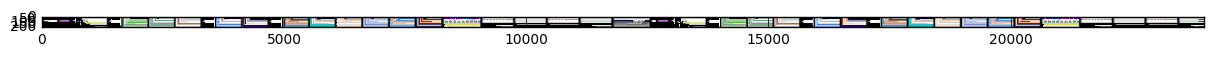

In [4]:
figsize(15,3)
imshow(img[0:1000]);

Rotate the image so that we can read each "column" as a "row"

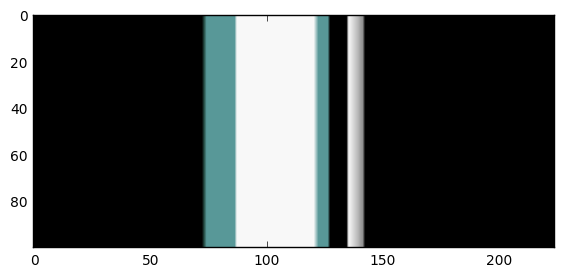

In [5]:
ii = img.swapaxes(0,1)
imshow(ii[100:200]);

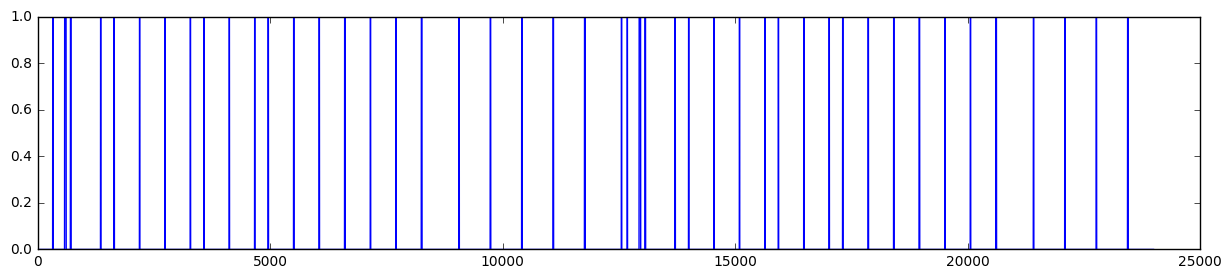

In [6]:
blackframe = (img == 0).all((0,2))
plot(blackframe);

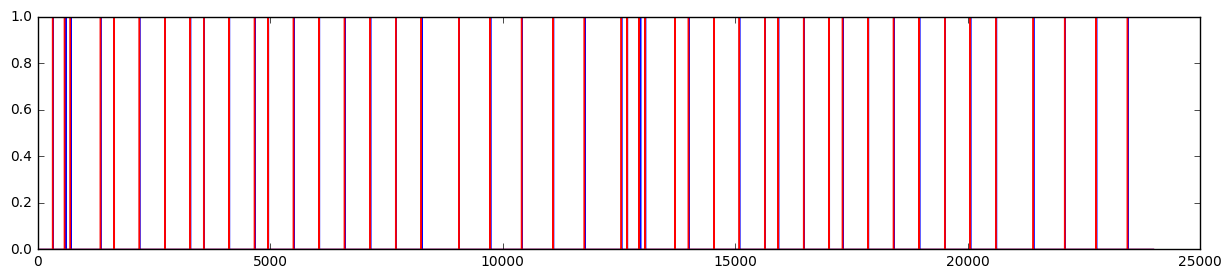

In [7]:
intro = blackframe[:-1] > blackframe[1:]
outro = blackframe[:-1] < blackframe[1:]
plot(intro);
plot(outro,color='red');

In [8]:
intros, = nonzero(intro)
outros, = nonzero(outro)
segments = zip(intros,outros)
list(enumerate(segments))

[(0, (8, 324)),
 (1, (330, 580)),
 (2, (613, 705)),
 (3, (719, 1353)),
 (4, (1359, 1643)),
 (5, (1650, 2190)),
 (6, (2196, 2736)),
 (7, (2743, 3283)),
 (8, (3289, 3573)),
 (9, (3580, 4120)),
 (10, (4126, 4666)),
 (11, (4672, 4956)),
 (12, (4964, 5504)),
 (13, (5513, 6053)),
 (14, (6061, 6601)),
 (15, (6614, 7154)),
 (16, (7162, 7702)),
 (17, (7711, 8251)),
 (18, (8266, 9058)),
 (19, (9068, 9733)),
 (20, (9744, 10409)),
 (21, (10419, 11084)),
 (22, (11095, 11760)),
 (23, (11776, 12553)),
 (24, (12561, 12679)),
 (25, (12685, 12935)),
 (26, (12968, 13060)),
 (27, (13074, 13708)),
 (28, (13714, 13998)),
 (29, (14005, 14545)),
 (30, (14551, 15091)),
 (31, (15098, 15638)),
 (32, (15644, 15928)),
 (33, (15935, 16475)),
 (34, (16481, 17021)),
 (35, (17027, 17311)),
 (36, (17319, 17859)),
 (37, (17868, 18408)),
 (38, (18416, 18956)),
 (39, (18969, 19509)),
 (40, (19517, 20057)),
 (41, (20066, 20606)),
 (42, (20621, 21413)),
 (43, (21423, 22088)),
 (44, (22099, 22764)),
 (45, (22774, 23439))]

/Users/joel/Downloads/timelines/venv/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


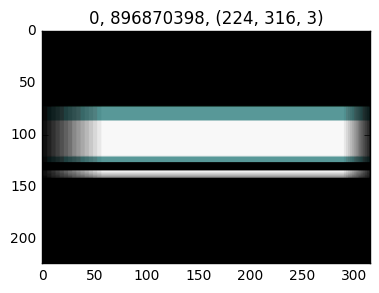

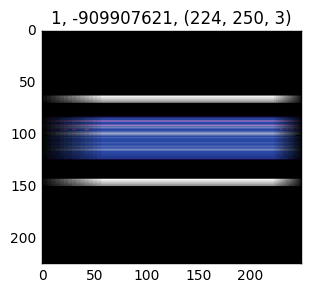

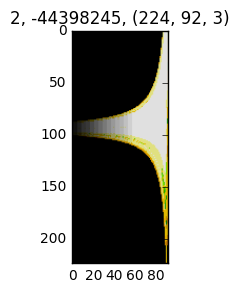

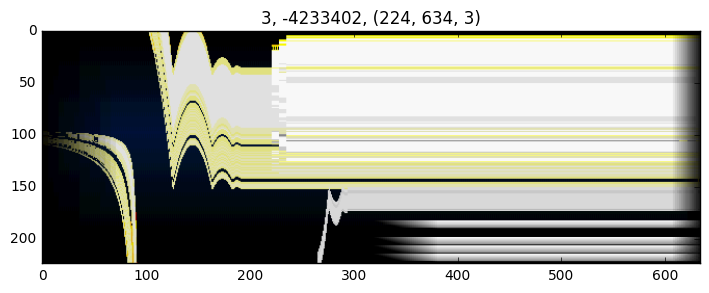

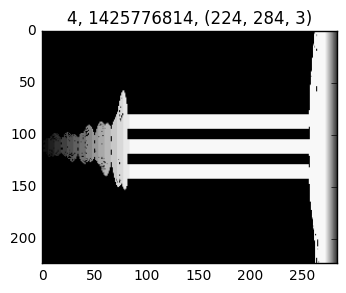

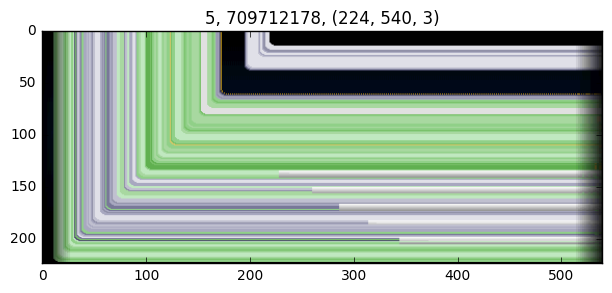

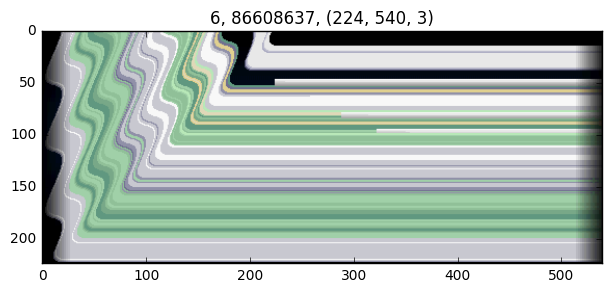

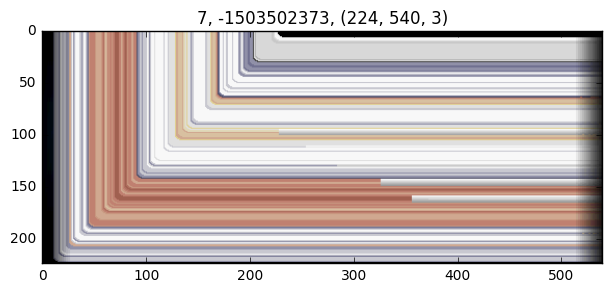

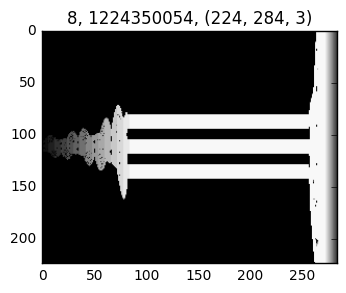

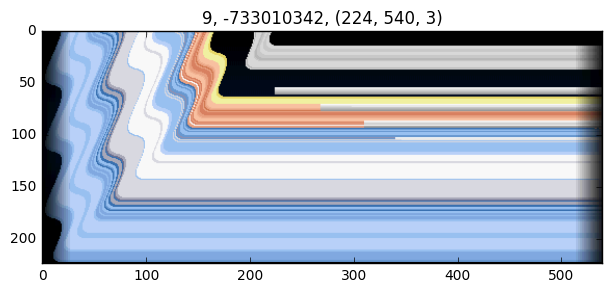

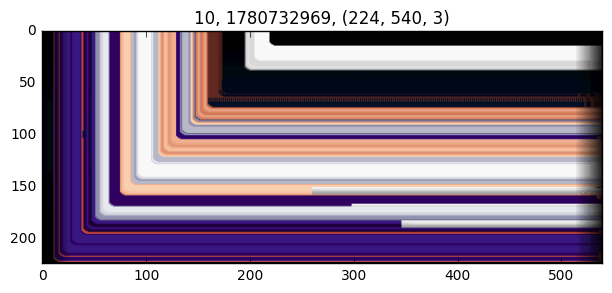

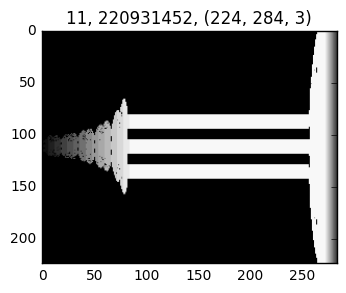

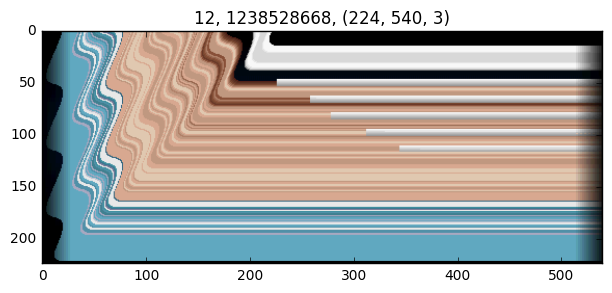

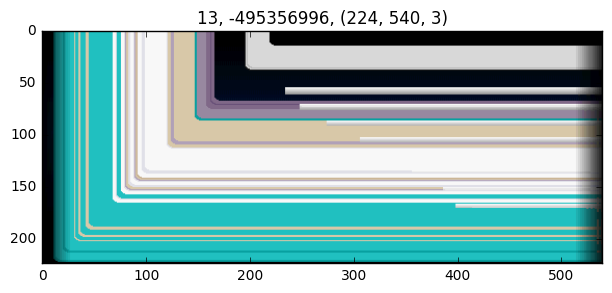

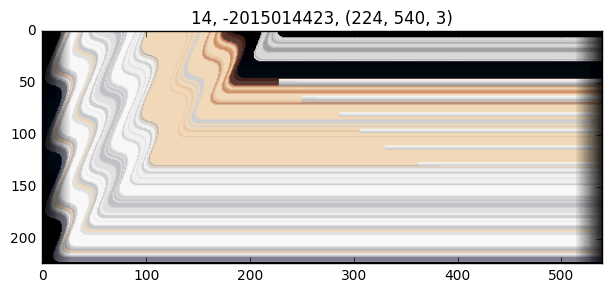

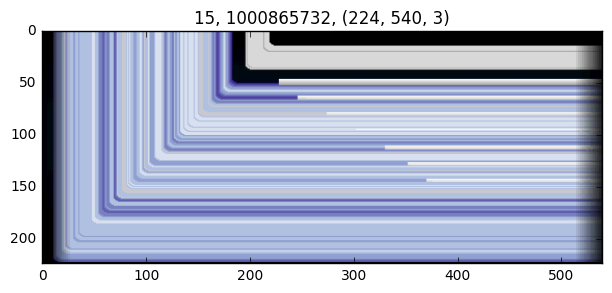

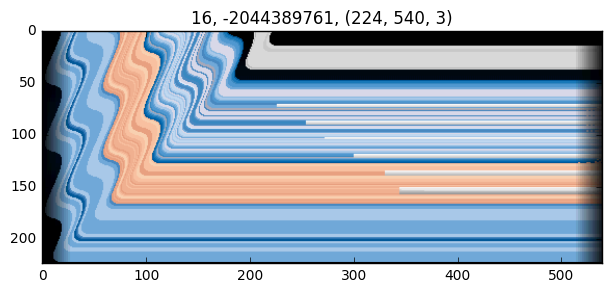

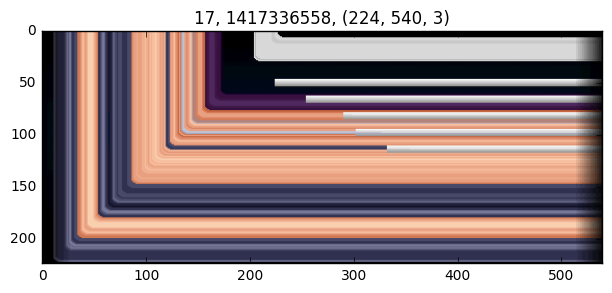

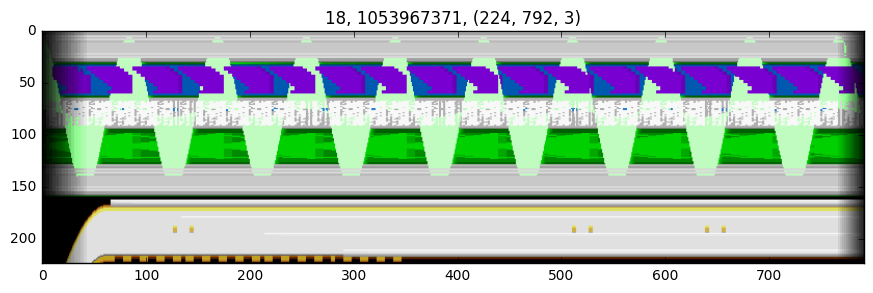

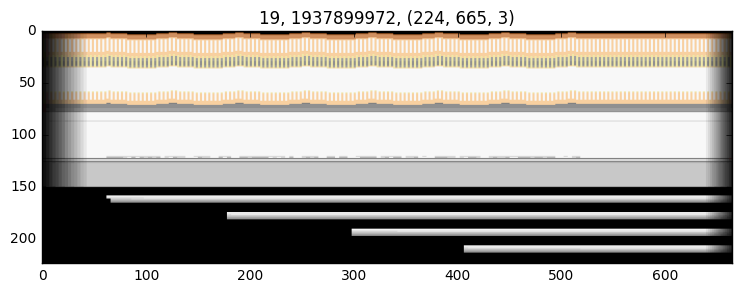

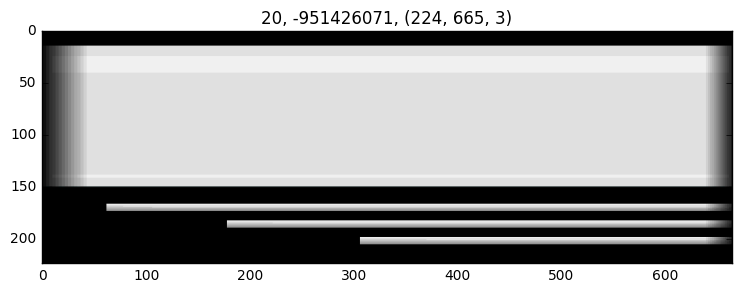

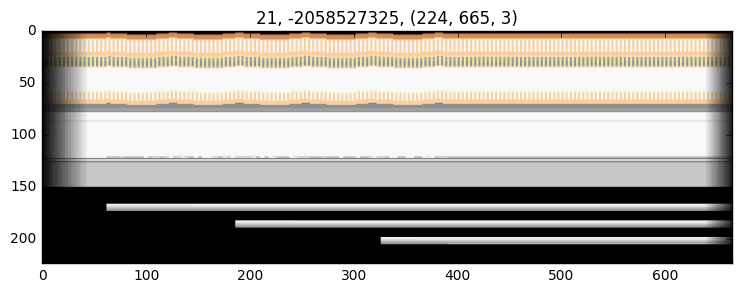

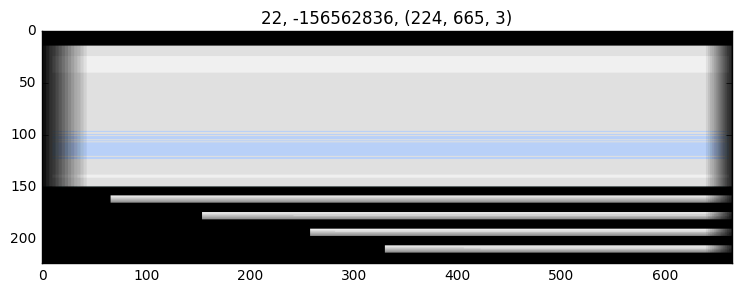

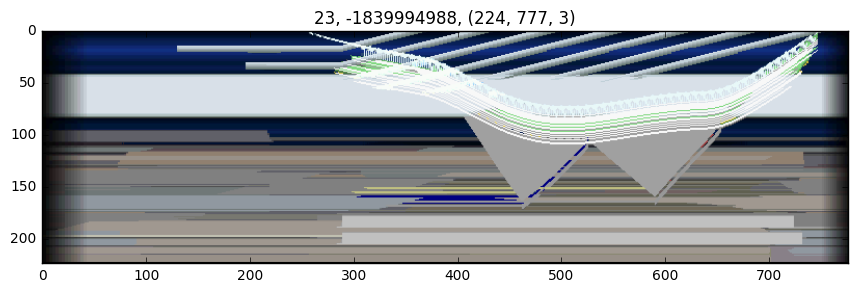

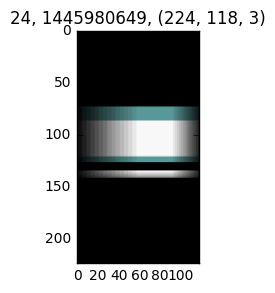

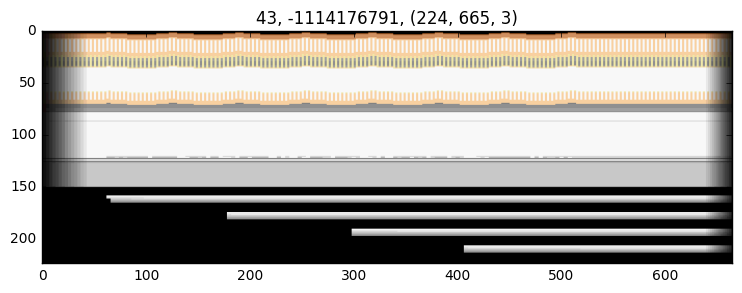

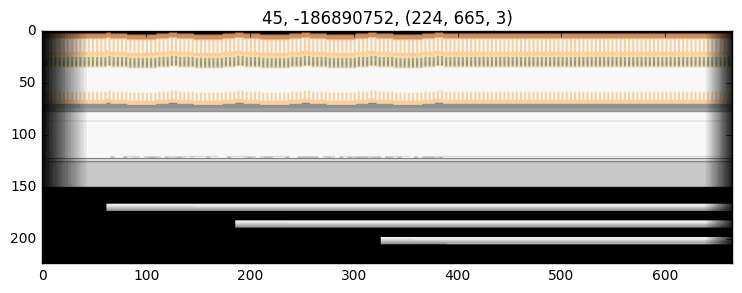

In [9]:
scene_strips = [img[:,a:b,:] for (a,b) in segments]
seen_before = {}
for i, s in enumerate(scene_strips):
    h = zlib.crc32(s.ravel())
    if h in seen_before:
        continue
    else:
        seen_before[h] = True
    figure();
    title("{}, {}, {}".format(i, h, s.shape));
    imshow(s);

((224, 284, 3), (224, 284, 3))

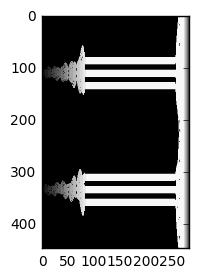

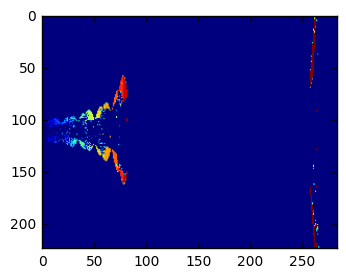

In [10]:
# a = scene_strips[1][:,:-1,:]
a = scene_strips[4]
b = scene_strips[8]
figure();
imshow(vstack([a,b]));
figure();
#imshow(abs(a-b).sum(2),cmap='gist_heat');
imshow(abs(a-b).sum(2));
a.shape, b.shape

In [11]:
import zlib
scene_hashes = map(lambda s: zlib.crc32(s.ravel()), scene_strips)
"Total: " + str(len(scene_hashes)), "Unique: " + str(len(unique(scene_hashes)))

('Total: 46', 'Unique: 27')